In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "track_prediction/results/test_file.csv"
df = pd.read_csv(file_path, index_col=False)
df = df.loc[df.track_id==2]
df.head()

,track_id,input1_latitude,input1_longitude,input2_latitude,input2_longitude,input3_latitude,input3_longitude,input4_latitude,input4_longitude,target_latitude,target_longitude,prediction_latitude,prediction_longitude
7,2,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,"[-0.003175199031829834, 0.031439654529094696, ...","[1.910503625869751, 1.9747651815414429, 2.0788..."
8,2,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,"[-0.19394487142562866, -0.007031567394733429, ...","[2.4928219318389893, 2.559429407119751, 2.6266..."
9,2,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,"[-0.4824463725090027, -0.19456303119659424, -0...","[2.390922784805298, 2.615448236465454, 2.65980..."
10,2,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,"[-0.9909624457359314, -0.9272375106811523, -0....","[2.2606468200683594, 2.214492082595825, 2.3384..."
11,2,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,-1.5,1.5,"[-1.4251606464385986, -1.3278656005859375, -1....","[1.6188409328460693, 1.795960783958435, 1.7878..."


In [4]:
index = np.random.randint(0, 15)

In [16]:

def get_confidence_interval_of_target(index):
    # Data
    data_lat = np.array(df.prediction_latitude.apply(lambda x: np.array(eval(x))).tolist())[index]
    data_long = np.array(df.prediction_longitude.apply(lambda x: np.array(eval(x))).tolist())[index]
    data = np.vstack((data_long, data_lat))

    _mean, _cov = np.mean(data, axis=1), np.cov(data)
    _mean, _cov
    
    from scipy.stats import multivariate_normal
    
    dist = multivariate_normal(mean=_mean, cov=_cov)

    x = np.linspace(_mean[0]-1, _mean[0]+1, 100)
    y = np.linspace(_mean[1]-1, _mean[1]+1, 100)

    xx, yy = np.meshgrid(x, y)

    pdf = np.zeros((100, 100))

    for i in range(100):
        for j in range(100):
            pdf[i, j] = dist.pdf([xx[i, j], yy[i, j]])

    return xx, yy, pdf


In [17]:
input_lat = np.array([df.input1_latitude, df.input2_latitude, df.input3_latitude, df.input4_latitude])
input_lat = np.transpose(input_lat).tolist()

input_long = np.array([df.input1_longitude, df.input2_longitude, df.input3_longitude, df.input4_longitude])
input_long = np.transpose(input_long).tolist()
print(input_lat[0])

[0.0, 0.0, 0.0, 0.0]


In [18]:
target_lat = np.concatenate([input_lat[0], df.target_latitude.values])
target_long = np.concatenate([input_long[0], df.target_longitude.values])

track_lat = []
track_long = []

for i in range(len(target_lat)):
    track_lat.append(target_lat[:i])
    track_long.append(target_long[:i])

target_lat = target_lat[len(input_lat[0]):]
target_long = target_long[len(input_long[0]):]

track_lat = np.array(track_lat, dtype=object)[len(input_lat[0]):]
track_long = np.array(track_long, dtype=object)[len(input_long[0]):]
track_lat.shape, track_long.shape

((19,), (19,))

In [110]:
index = 4
inc = 4

marker_size = 50
pad = 2
xlim = target_long.min() - pad, target_long.max() + pad
ylim = target_lat.min() - pad, target_lat.max() + pad

plot_path = "track_prediction/plots/contours/test_contour_{}.png"



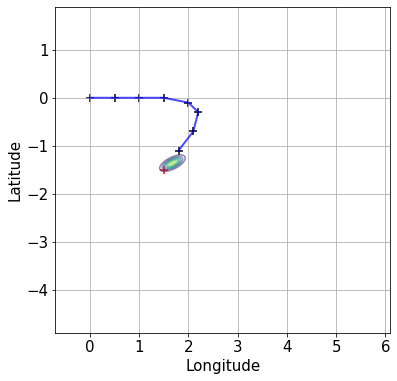

In [119]:
fig = plt.figure(figsize=(6, 6))

# Timestep 5
ax1 = fig.add_subplot(111)
xx, yy, pdf = get_confidence_interval_of_target(index)
ax1.contour(xx, yy, pdf, alpha=0.6)
ax1.scatter(
    track_long[index],
    track_lat[index], 
    marker = '+', s=marker_size, color="black",
    label='previous locations'
)
ax1.plot(
    track_long[index], 
    track_lat[index], 
    color="blue", alpha=0.7, linewidth=2,
    label='trace of trajectory'
)
ax1.scatter(
    target_long[index],
    target_lat[index],
    marker = '+', s=marker_size, color="red",
    label='true location'

)
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.grid()
ax1.set_xlabel("Longitude", fontsize=15)
ax1.set_ylabel("Latitude", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)
# fig.legend()

fig.savefig(plot_path.format(index+1))



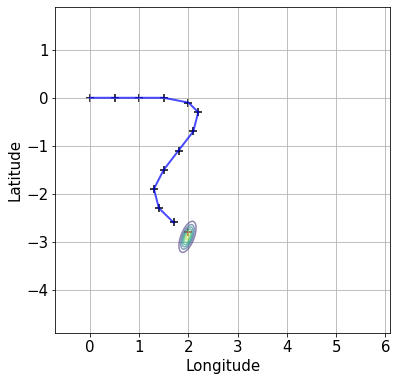

In [120]:
fig = plt.figure(figsize=(6, 6))

# Timestep 5
ax1 = fig.add_subplot(111)
xx, yy, pdf = get_confidence_interval_of_target(index+inc)
ax1.contour(xx, yy, pdf, alpha=0.6)
ax1.scatter(
    track_long[index + inc],
    track_lat[index + inc], 
    marker = '+', s=marker_size, color="black",
    label='previous locations'
)
ax1.plot(
    track_long[index + inc], 
    track_lat[index + inc], 
    color="blue", alpha=0.7, linewidth=2,
    label='trace of trajectory'
)
ax1.scatter(
    target_long[index + inc],
    target_lat[index + inc],
    marker = '+', s=marker_size, color="red",
    label='true location'

)
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.grid()
ax1.set_xlabel("Longitude", fontsize=15)
ax1.set_ylabel("Latitude", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)
# fig.legend()

fig.savefig(plot_path.format(index + inc + 1))



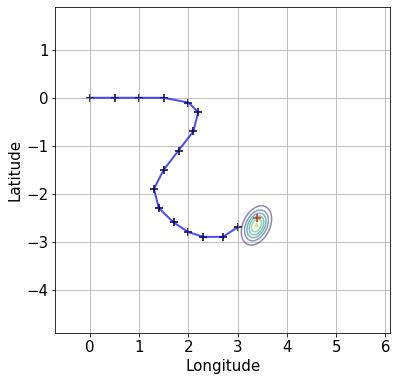

In [121]:
fig = plt.figure(figsize=(6, 6))

# Timestep 5
ax1 = fig.add_subplot(111)
xx, yy, pdf = get_confidence_interval_of_target(index+2*inc)
ax1.contour(xx, yy, pdf, alpha=0.6)
ax1.scatter(
    track_long[index + 2*inc],
    track_lat[index + 2*inc], 
    marker = '+', s=marker_size, color="black",
    label='previous locations'
)
ax1.plot(
    track_long[index + 2*inc], 
    track_lat[index + 2*inc], 
    color="blue", alpha=0.7, linewidth=2,
    label='trace of trajectory'
)
ax1.scatter(
    target_long[index + 2*inc],
    target_lat[index + 2*inc],
    marker = '+', s=marker_size, color="red",
    label='true location'

)
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.grid()
ax1.set_xlabel("Longitude", fontsize=15)
ax1.set_ylabel("Latitude", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)

fig.savefig(plot_path.format(index + 2*inc + 1))



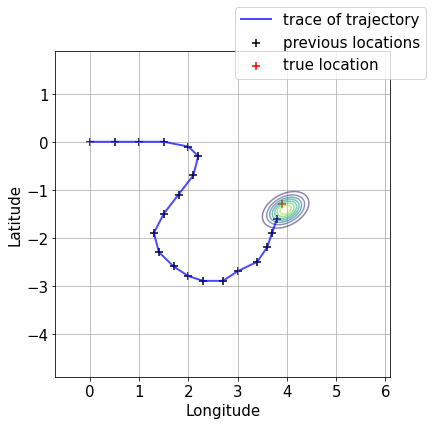

In [122]:
fig = plt.figure(figsize=(6, 6))

# Timestep 5
ax1 = fig.add_subplot(111)
xx, yy, pdf = get_confidence_interval_of_target(index+3*inc)
ax1.contour(xx, yy, pdf, alpha=0.6)
ax1.scatter(
    track_long[index + 3*inc],
    track_lat[index + 3*inc], 
    marker = '+', s=marker_size, color="black",
    label='previous locations'
)
ax1.plot(
    track_long[index + 3*inc], 
    track_lat[index + 3*inc], 
    color="blue", alpha=0.7, linewidth=2,
    label='trace of trajectory'
)
ax1.scatter(
    target_long[index + 3*inc],
    target_lat[index + 3*inc],
    marker = '+', s=marker_size, color="red",
    label='true location'

)
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.grid()
fig.legend(loc='upper right', fontsize=15)


ax1.set_xlabel("Longitude", fontsize=15)
ax1.set_ylabel("Latitude", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)

fig.savefig(plot_path.format(index + 3*inc + 1))



In [149]:
# df.loc[:, ["prediction_longitude", "prediction_latitude"]]
prediction_long = df.prediction_longitude.apply(lambda x: np.asarray(x[1:-1].split(', ')).astype(float))
prediction_long = np.stack(prediction_long.values).mean(axis=1)


prediction_lat = df.prediction_latitude.apply(lambda x: np.asarray(x[1:-1].split(', ')).astype(float))
prediction_lat = np.stack(prediction_lat.values).mean(axis=1)

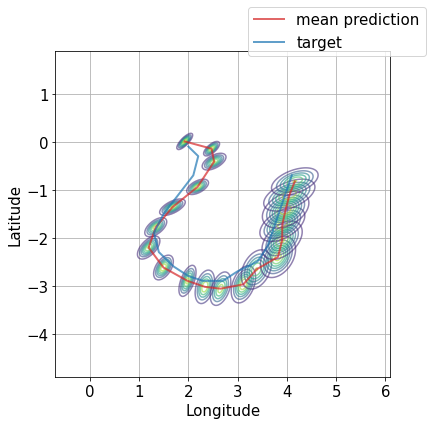

In [163]:
fig = plt.figure(figsize=(6, 6))

# Timestep 5
ax1 = fig.add_subplot(111)
for index in range(0,len(prediction_long)):
    xx, yy, pdf = get_confidence_interval_of_target(index)
    ax1.contour(xx, yy, pdf, alpha=0.6)
ax1.plot(
    prediction_long, 
    prediction_lat, 
    color="tab:red", alpha=0.7, linewidth=2,
    label='mean prediction'
)
ax1.plot(
    df.target_longitude, 
    df.target_latitude, 
    color="tab:blue", alpha=0.7, linewidth=2,
    label='target'
)


ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.grid()
fig.legend(loc='upper right', fontsize=15)


ax1.set_xlabel("Longitude", fontsize=15)
ax1.set_ylabel("Latitude", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)

fig.savefig(plot_path.format(index + 3*inc + 1))
